Predicting Hand-Written Digits

In this Jupyter Notebook, we will be using numpy, keras, and scikit-learn to predict which digit is contained in pictures of hand-written digits.

There will be four neural networks defined in this notebook. The former two will have a single hidden layer each, and the ladder two will have two hidden layers each.

First: We will create a Neural Network model with 100 nodes contained in its lone hidden layer...

In [1]:
## importing the mnist dataset, which contains 60,000 handwritten digits between 0 - 9
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# The following code grabs one example photo of a handwritten digit in the mnist dataset...
i = np.where(y_train==6)[0][0]
print("label: ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
label:  6


<Figure size 640x480 with 1 Axes>

In [2]:
# The data needs to be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000, 28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [3]:
print(y_train.shape)
print("label: ", y_train[i, :])

(60000, 10)
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [4]:
# Okay, now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1
))

In [5]:
from keras import models
from keras import layers
from keras import optimizers

model1 = models.Sequential()
model1.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

# compile the model
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Now fit the model:
eps = 25
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 20us/step - loss: 8.3367 - acc: 0.4756 - val_loss: 6.1846 - val_acc: 0.6098
Epoch 2/25
48000/48000 [==============================] - 1s 18us/step - loss: 5.7903 - acc: 0.6351 - val_loss: 5.6940 - val_acc: 0.6417
Epoch 3/25
48000/48000 [==============================] - 1s 18us/step - loss: 5.5310 - acc: 0.6524 - val_loss: 5.3611 - val_acc: 0.6638
Epoch 4/25
48000/48000 [==============================] - 1s 19us/step - loss: 5.3923 - acc: 0.6619 - val_loss: 5.4200 - val_acc: 0.6601
Epoch 5/25
48000/48000 [==============================] - 1s 19us/step - loss: 5.3452 - acc: 0.6655 - val_loss: 5.4095 - val_acc: 0.6606
Epoch 6/25
48000/48000 [==============================] - 1s 19us/step - loss: 5.2945 - acc: 0.6685 - val_loss: 5.3146 - val_acc: 0.6668
Epoch 7/25
48000/48000 [==============================] - 1s 19us/step - loss: 5

I will now plot the Training and Validation loss results from the Neural Network:

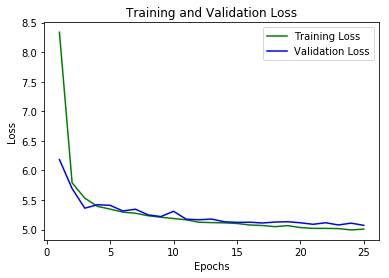

In [7]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Next, I will plot the Training Accuracy and the Validation Accuracy results from the Neural Network: 

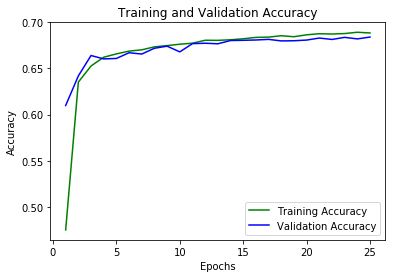

In [8]:
plt.clf() # clear the figure

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:
# Time to view the resulting confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 972,    0,    0,    1,    3,    0,    0,    0,    3,    1],
       [   0, 1118,    4,    1,    0,    0,    0,    0,   12,    0],
       [   8,    0,  986,    9,   14,    0,    0,    0,   14,    1],
       [   0,    0,    4,  982,    5,    0,    0,    0,   16,    3],
       [   0,    1,    3,    0,  972,    0,    0,    0,    2,    4],
       [  54,    7,    3,  312,   45,    0,    0,    0,  423,   48],
       [ 141,    8,   34,    7,  607,    1,    0,    0,  159,    1],
       [   6,   12,  154,  253,   46,    0,    0,    0,   35,  522],
       [   5,    1,    5,   10,   11,    0,    0,    0,  940,    2],
       [   5,    2,    0,   11,   42,    0,    0,    0,    7,  942]])

In [10]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       980
           1       0.97      0.99      0.98      1135
           2       0.83      0.96      0.89      1032
           3       0.62      0.97      0.76      1010
           4       0.56      0.99      0.71       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.58      0.97      0.73       974
           9       0.62      0.93      0.74      1009

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.50      0.68      0.57     10000
weighted avg       0.51      0.69      0.58     10000



/home/connerverret/test/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Next, I will create a Neural Network model with 400 nodes in the hidden layer:

In [11]:
model2 = models.Sequential()
model2.add(layers.Dense(400, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now I will fit the model:
eps = 25
history = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 3s 60us/step - loss: 13.0885 - acc: 0.1873 - val_loss: 13.0347 - val_acc: 0.1912
Epoch 2/25
48000/48000 [==============================] - 3s 59us/step - loss: 12.2263 - acc: 0.2409 - val_loss: 11.5247 - val_acc: 0.2847
Epoch 3/25
48000/48000 [==============================] - 3s 62us/step - loss: 11.2496 - acc: 0.3013 - val_loss: 10.9479 - val_acc: 0.3192
Epoch 4/25
48000/48000 [==============================] - 3s 63us/step - loss: 9.3041 - acc: 0.4213 - val_loss: 8.9006 - val_acc: 0.4462
Epoch 5/25
48000/48000 [==============================] - 3s 62us/step - loss: 8.7795 - acc: 0.4542 - val_loss: 8.6187 - val_acc: 0.4645
Epoch 6/25
48000/48000 [==============================] - 3s 66us/step - loss: 8.7127 - acc: 0.4586 - val_loss: 8.6127 - val_acc: 0.4647
Epoch 7/25
48000/48000 [==============================] - 3s 68us/step - loss: 8.6495 - acc: 0.4627 - val_loss: 8.5941 - v

I will now plot the Training and Validation loss results from the Neural Network:

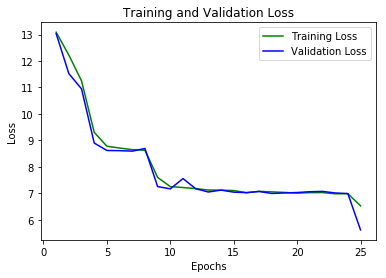

In [12]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Here, I plot the Training Accuracy and Validation Accuracy results from the Neural Network:

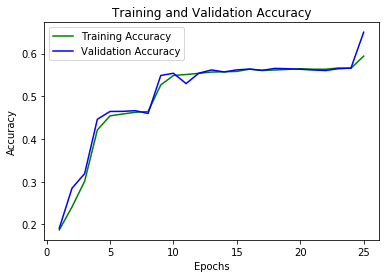

In [13]:
plt.clf() # clear the figure

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Next, we will display the confusion matrix:

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 966,    0,    0,    0,    0,    4,    4,    3,    3,    0],
       [   0,    0,   13,    0,    0,    5,   14,   81, 1022,    0],
       [   7,    0,  912,    0,    6,    7,    7,   32,   61,    0],
       [   2,    0,   39,    0,    0,  543,    1,   42,  383,    0],
       [   2,    0,    0,    0,  935,    1,    7,   24,   13,    0],
       [   3,    0,    0,    0,    0,  875,    8,    0,    6,    0],
       [   6,    0,    1,    0,    8,   13,  921,    4,    5,    0],
       [  12,    0,   16,    0,   11,    4,    1,  952,   32,    0],
       [   3,    0,    0,    0,    2,    9,    3,   19,  938,    0],
       [   7,    0,    0,    0,  364,   29,    0,  520,   89,    0]])

Now, I will display the classification matrix:

In [17]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.00      0.00      0.00      1135
           2       0.93      0.88      0.91      1032
           3       0.00      0.00      0.00      1010
           4       0.71      0.95      0.81       982
           5       0.59      0.98      0.73       892
           6       0.95      0.96      0.96       958
           7       0.57      0.93      0.70      1028
           8       0.37      0.96      0.53       974
           9       0.00      0.00      0.00      1009

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.51      0.67      0.56     10000
weighted avg       0.50      0.65      0.55     10000



The next Neural Network model will contain 2 hidden layers, each with 200 nodes in it.

In [18]:
# 2 hidden layers
model3 = models.Sequential()
model3.add(layers.Dense(200, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

#compile the model
model3.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Fitting the model:
eps = 25
history = model3.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 49us/step - loss: 9.6673 - acc: 0.3965 - val_loss: 8.3282 - val_acc: 0.4812
Epoch 2/25
48000/48000 [==============================] - 2s 47us/step - loss: 8.2046 - acc: 0.4884 - val_loss: 7.1178 - val_acc: 0.5542
Epoch 3/25
48000/48000 [==============================] - 3s 53us/step - loss: 6.1954 - acc: 0.6102 - val_loss: 4.1281 - val_acc: 0.7379
Epoch 4/25
48000/48000 [==============================] - 2s 42us/step - loss: 4.1076 - acc: 0.7396 - val_loss: 4.4921 - val_acc: 0.7139
Epoch 5/25
48000/48000 [==============================] - 2s 40us/step - loss: 3.9189 - acc: 0.7528 - val_loss: 3.7993 - val_acc: 0.7606
Epoch 6/25
48000/48000 [==============================] - 2s 46us/step - loss: 3.7829 - acc: 0.7616 - val_loss: 3.7314 - val_acc: 0.7651
Epoch 7/25
48000/48000 [==============================] - 2s 38us/step - loss: 3.7343 - acc: 0.7655 - val_loss: 3.8376 - val_acc

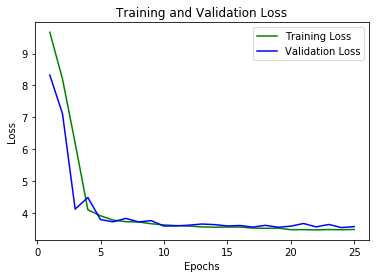

In [20]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

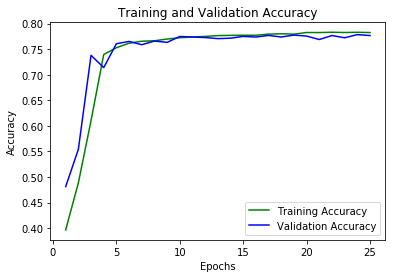

In [21]:
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
# Confusion Matrix
y_pred = model3.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 932,    0,    4,    0,    0,    2,   37,    1,    4,    0],
       [   0, 1124,    3,    0,    0,    0,    4,    3,    1,    0],
       [   3,    3, 1000,    3,    0,    0,    8,   13,    2,    0],
       [   0,    4,   10,  970,    0,    5,    3,   11,    7,    0],
       [  10,    6,   35,   12,    0,    8,  127,  578,  206,    0],
       [   5,    2,    1,   16,    0,  834,   27,    2,    5,    0],
       [   3,    3,    0,    0,    0,    1,  947,    1,    3,    0],
       [   2,    6,    8,    2,    0,    1,    0, 1007,    2,    0],
       [   1,    4,    5,    5,    0,    1,    5,   20,  933,    0],
       [   5,   13,   12,   65,    0,   17,   16,  778,  103,    0]])

In [23]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       980
           1       0.96      0.99      0.98      1135
           2       0.93      0.97      0.95      1032
           3       0.90      0.96      0.93      1010
           4       0.00      0.00      0.00       982
           5       0.96      0.93      0.95       892
           6       0.81      0.99      0.89       958
           7       0.42      0.98      0.59      1028
           8       0.74      0.96      0.83       974
           9       0.00      0.00      0.00      1009

   micro avg       0.77      0.77      0.77     10000
   macro avg       0.67      0.77      0.71     10000
weighted avg       0.67      0.77      0.71     10000



The next Neural Network model will contain 2 hidden layers. The first hidden layer will have 200 nodes in it and the 2nd hidden layer will have 100 nodes in it.

In [24]:
# 2 hidden layers
model4 = models.Sequential()
model4.add(layers.Dense(200, activation='relu', input_shape=(784,)))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

#compile the model
model4.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model:
eps = 25
history = model4.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 41us/step - loss: 10.9420 - acc: 0.3157 - val_loss: 7.4536 - val_acc: 0.5312
Epoch 2/25
48000/48000 [==============================] - 2s 38us/step - loss: 7.2828 - acc: 0.5439 - val_loss: 7.2145 - val_acc: 0.5482
Epoch 3/25
48000/48000 [==============================] - 2s 39us/step - loss: 7.1293 - acc: 0.5543 - val_loss: 7.0597 - val_acc: 0.5589
Epoch 4/25
48000/48000 [==============================] - 2s 39us/step - loss: 7.0338 - acc: 0.5606 - val_loss: 6.9794 - val_acc: 0.5651
Epoch 5/25
48000/48000 [==============================] - 2s 40us/step - loss: 6.9679 - acc: 0.5657 - val_loss: 6.9576 - val_acc: 0.5662
Epoch 6/25
48000/48000 [==============================] - 2s 38us/step - loss: 6.9460 - acc: 0.5673 - val_loss: 6.9275 - val_acc: 0.5684
Epoch 7/25
48000/48000 [==============================] - 2s 42us/step - loss: 6.9388 - acc: 0.5678 - val_loss: 6.9161 - val_ac

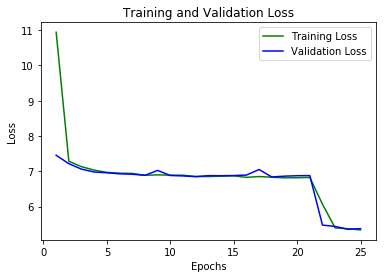

In [25]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred = model4.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

1. Which model gives the best accuracy? Which the best overall F1 score?

2. Which model gives the worst accuracy? Which the worst overall F1 score?

3. What is the shape of the training set? How many nodes are in the input layer of the network?

4. Why do you think the best/worst networks are that way?

5. Experiment and try to create a better performing network. Explain what you tried and document the results.